In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

def show_data_summary(input_data):
    print("Describe Data:")
    print(input_data.describe())

    print("\nFirst 10 rows:")
    print(input_data.head(10))
    print("....")

def data_hist(input_data):
    input_data.hist(bins=100, figsize=(20, 12))
    plt.show()

def data_scatter(input_data):
    input_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
    plt.show()

def permutation_split(data, ratio):
    permutation = np.random.permutation(len(data))
    train_size = int(len(data) * (1 - ratio))
    train_index = permutation[:train_size]
    test_index = permutation[train_size:]
    return data.iloc[train_index], data.iloc[test_index]

def encode_label(data):
    encoder = LabelEncoder()
    data["ocean_proximity"] = encoder.fit_transform(data["ocean_proximity"])

def imputer_by_median(data):
    imputer = Imputer(strategy="median")
    X = imputer.fit_transform(data)
    return pd.DataFrame(X, columns=data.columns)

def scale_data(data):
    scalar = MinMaxScaler(feature_range=(0, 100), copy=False)
    scalar.fit_transform(data)

def compare_scale_data(origin, scaled):
    plt.subplot(2, 1, 1)
    plt.scatter(x=origin["longitude"], y=origin["latitude"],
        c=origin["median_house_value"], cmap="viridis", alpha=0.1)
    plt.subplot(2, 1, 2)
    plt.scatter(x=scaled["longitude"], y=scaled["latitude"],
        c=origin["median_house_value"], cmap="viridis", alpha=0.1)
    plt.show()

def show_predict_result(test_data, test_value, predict_value):
    ax = plt.subplot(221)
    plt.scatter(x=test_data["longitude"], y=test_data["latitude"],
        s=test_value, c="dodgerblue", alpha=0.5)
    plt.subplot(222)
    plt.hist(test_value, color="dodgerblue")

    plt.subplot(223)
    plt.scatter(x=test_data["longitude"], y=test_data["latitude"],
        s=predict_value, c="lightseagreen", alpha=0.5)
    plt.subplot(224)
    plt.hist(predict_value, color="lightseagreen")

    plt.show()

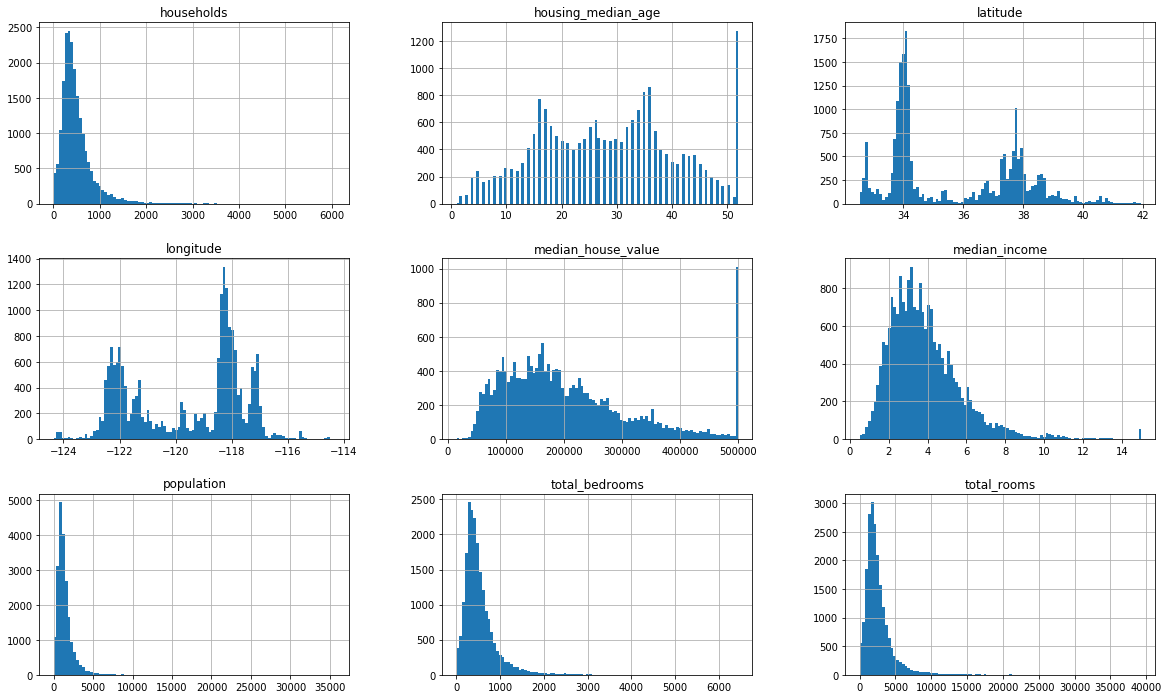

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

input_data = pd.read_csv("./housing.csv")
input_data.hist(bins=100, figsize=(20, 12))
plt.show()

In [30]:
# data = input_data

input_data = pd.read_csv("./housing.csv")
# show_data_summary(input_data)
# data_scatter(input_data)

encode_label(input_data)
input_data = imputer_by_median(input_data)


# show_data_summary(input_data)

scale_data(input_data)
# compare_scale_data(pd.read_csv("./data/housing.csv"), input_data)

train_set, test_set = train_test_split(input_data,
    test_size=0.1, random_state=59)
train_data, train_value = split_house_value(train_set)
test_data, test_value = split_house_value(test_set)
#show_data_summary(train_data)

linear_reg = LinearRegression()
linear_reg.fit(train_data, train_value)

predict_value = linear_reg.predict(test_data)
print("Diff: {}".format(MES_evaluation(test_value, predict_value)))

scores = cross_val_score(linear_reg, train_data, train_value, cv=10)
print("cross_val_score: {}".format(scores))


Describe Data:
          longitude      latitude  housing_median_age   total_rooms  \
count  18576.000000  18576.000000        18576.000000  18576.000000   
mean      47.523333     32.921663           54.221977      6.699287   
std       19.988700     22.708467           24.681143      5.518132   
min        0.000000      0.106270            0.000000      0.000000   
25%       25.298805     14.771520           33.333333      3.682792   
50%       58.266932     18.278427           54.901961      5.407193   
75%       63.147410     55.047821           70.588235      8.012234   
max      100.000000    100.000000          100.000000    100.000000   

       total_bedrooms    population    households  median_income  \
count    18576.000000  18576.000000  18576.000000   18576.000000   
mean         8.315912      3.983881      8.198997      23.304299   
std          6.475838      3.125516      6.248683      13.134217   
min          0.000000      0.000000      0.000000       0.000000   
25%  

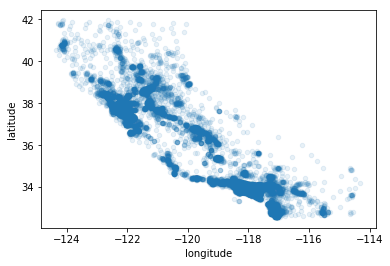

In [4]:
input_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

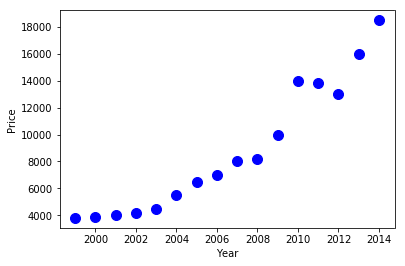

In [5]:
# house_price.py

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.DataFrame({
    "Year": [1999,2000,2001,2002,2003,2004,2005,2006,
        2007,2008,2009,2010,2011,2012,2013,2014],
    "Price": [3800,3900,4000,4200,4500,5500,6500,7000,
        8000,8200,10000,14000,13850,13000,16000,18500]})
data.plot(kind="scatter", x="Year", y="Price", c="B", s=100)
plt.show()

In [6]:
数据划分
为了得到预测模型，我们需要将所得到的数据划分成训练集和测试集两个部分。

前者用来训练数据模型，后者用来对于模型进行测试和验证。通常情况下，我们会用大部分的数据来训练，小部分的数据来测试。

在进行数据划分的时候，我们应该做到尽可能的“随机”。即：训练集和测试集都能尽可能的反应真实的数据模型。

permutation
permutation是numpy提供的接口。它将指定范围内的整数打乱以生成随机数。下面是一段代码示例：

SyntaxError: invalid character in identifier (<ipython-input-6-f1fe6ae53aec>, line 2)

In [7]:


import numpy as np

data = np.arange(0, 100)
np.random.seed(59)
print(data[np.random.permutation(100)[90:]])
#这里我们将[0, 100)范围内的100个随机数进行了打乱。在打乱前通过np.random.seed(59)设置了随机数的种子，这样保证生成的随机数是稳定的。

#最后我们打印出了打乱后数据的最后10个：

#[64 67  0 57 53 79 23 77 44 49]
#有了这些打乱的整数，我们便可以以此为索引来从已有的数据集中删选出训练集和测试集。例如：[0, 90]作为训练集，[90:]作为测试集。

##train_test_split
##sklearn也提供了类似的功能。这个函数就是train_test_split。代码示例如下：

import numpy as np
from sklearn.model_selection import train_test_split

data = np.arange(0, 100)
train_set, test_set = train_test_split(data, test_size=0.1, random_state=59)
print("test_set: \n {} \n".format(test_set))
#这里的test_size指定了测试集的比例，random_state指定了随机数的种子。

#这个函数会返回train_set和test_set两个集合。前者占90%的数据，后者占10%。我们打印出了测试集的数据结果：

      
import numpy as np
from sklearn.model_selection import train_test_split

data = np.arange(0, 100)
train_set, test_set = train_test_split(data, test_size=0.1, random_state=59)
print("data_set: \n {} \n".format(data))
print("train_set: \n {} \n".format(train_set))
print("test_set: \n {} \n".format(test_set))


[64 67  0 57 53 79 23 77 44 49]
test_set: 
 [38 46 24 87 30 85 16 96 18 99] 

data_set: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 

train_set: 
 [69 78 26 22 65 60 15 10 27 12 47 34 28 19 81 42 92 88 13 31  1 72 43 91
 58 76 93 63 97 52 25  7 71 11  5  3 82 62 61 89 84 36  6  8 94 90 54 17
 80 55  9 37 86 21 59 70 35 39 98 32 95 51 29 14  4 40 74 41 56  2 68 50
 75 33 66 20 73 48 45 83 64 67  0 57 53 79 23 77 44 49] 

test_set: 
 [38 46 24 87 30 85 16 96 18 99] 



Describe Data:
               x1          x2          x3          x4          x5          x6  \
count  923.000000  923.000000  923.000000  923.000000  923.000000  923.000000   
mean     5.255818   33.161159    5.463023    5.569718   36.333738   50.064247   
std      2.354354   33.748779    2.286232    2.305955   31.544024    6.727239   
min      1.100000    1.210000    1.100000    1.100000    1.210000   40.350000   
25%      3.630000   13.180000    3.930000    3.975000   15.780000   44.500000   
50%      4.800000   23.080000    5.100000    5.090000   25.940000   50.100000   
75%      6.255000   39.120000    6.500000    6.520000   42.515000   53.850000   
max     17.960000  322.610000   15.810000   15.810000  249.960000   78.950000   

               x7  x_true_price  
count   923.00000    923.000000  
mean   2551.63442      5.201549  
std     706.10230      2.393900  
min    1628.12000      1.100000  
25%    1980.25000      3.545000  
50%    2510.01000      4.610000  
75%    2899.82000

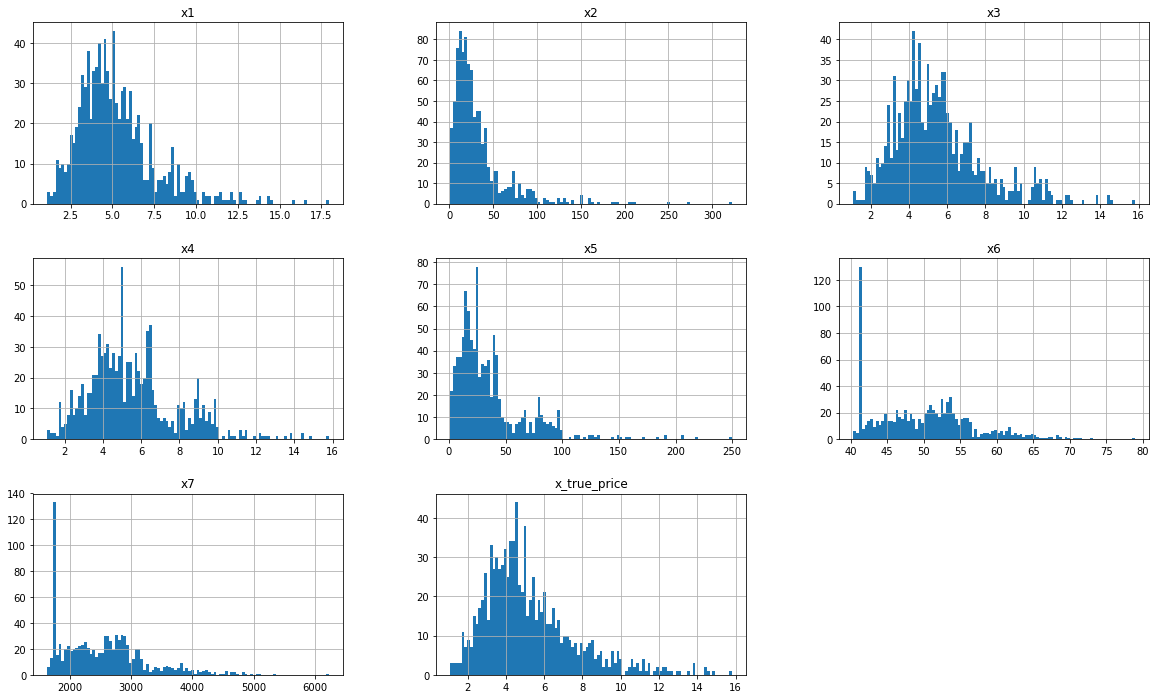

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

input_data =  pd.read_csv("./query_result.csv", usecols=[1,2,3,4,5,6,7,8], header=None, names=['x1','x2', 'x3', 'x4', 'x5', 'x6','x7', 'x_true_price',])

#print(input_data)

print("Describe Data:")
print(input_data.describe())

print("\nFirst 10 rows:")
print(input_data.head(10))

input_data.hist(bins=100, figsize=(20, 12))
plt.show()

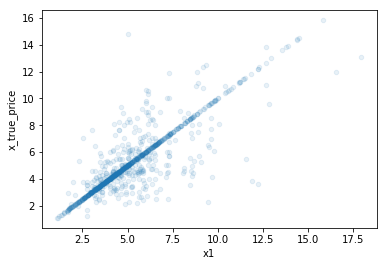

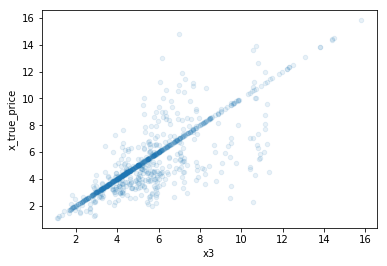

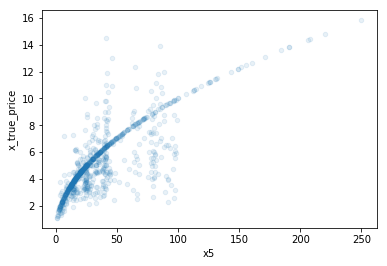

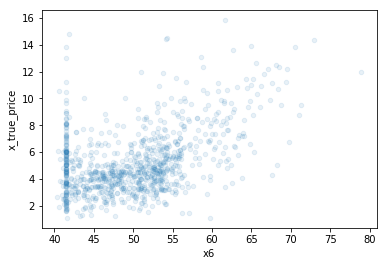

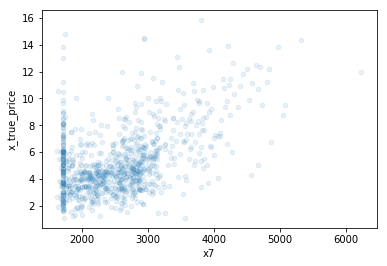

In [9]:
input_data.plot(kind="scatter", x="x1", y="x_true_price", alpha=0.1)
input_data.plot(kind="scatter", x="x3", y="x_true_price", alpha=0.1)
input_data.plot(kind="scatter", x="x5", y="x_true_price", alpha=0.1)
input_data.plot(kind="scatter", x="x6", y="x_true_price", alpha=0.1)
input_data.plot(kind="scatter", x="x7", y="x_true_price", alpha=0.1)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(input_data, test_size=0.1, random_state=59)
#print("data_set: \n {} \n".format(input_data))
#print("train_set: \n {} \n".format(train_set))
#print("test_set: \n {} \n".format(test_set))

show_data_summary(test_set)


Describe Data:
              x1          x2         x3         x4          x5         x6  \
count  93.000000   93.000000  93.000000  93.000000   93.000000  93.000000   
mean    5.098817   29.688602   5.626452   5.661828   36.167527  49.852688   
std     1.930861   24.981029   2.092373   2.038193   26.139588   5.868956   
min     1.500000    2.250000   1.870000   1.500000    2.250000  41.100000   
25%     3.750000   14.060000   4.280000   4.390000   19.270000  44.600000   
50%     4.850000   23.570000   5.100000   5.130000   26.270000  50.550000   
75%     6.000000   36.000000   6.830000   6.540000   42.770000  53.750000   
max    12.220000  149.350000  11.080000  11.220000  125.890000  61.950000   

                x7  x_true_price  
count    93.000000     93.000000  
mean   2519.363871      5.161398  
std     591.632917      2.022077  
min    1689.210000      1.500000  
25%    1989.160000      3.750000  
50%    2555.300000      4.760000  
75%    2889.060000      6.000000  
max    3837